In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
path_to_file='https://raw.githubusercontent.com/DeepConnectAI/challenge-week-2/master/data/simple_linear_data.csv'
data=pd.read_csv(path_to_file)

In [3]:
data['bias']=1
data.head()

,G2,G3,bias
0,30,30,1
1,25,30,1
2,40,50,1
3,70,75,1
4,50,50,1


In [4]:
X=data[['bias','G2']].to_numpy(dtype=np.float64)
y=data['G3'].to_numpy(dtype=np.float64)

In [5]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(395, 2)
y: Type-<class 'numpy.ndarray'>, Shape-(395,)


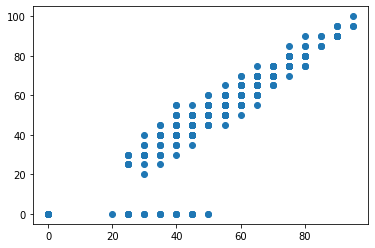

In [6]:
plt.scatter(X[:,1],y)

In [7]:
def predict(X, weights):
    '''
    weights   : array (2,1) w0 and w1
    X         : array (m,2) x0 (intercept=1) and x1
    
    Returns predicted y using hyothesis linear function defined by given weights
    '''
    ### START CODE HERE ###
    y_pred = np.dot(X,weights)
    ### END CODE HERE ###
    
    assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred

In [8]:
def mean_squared_error(y_true, y_pred) : 
    '''
    y_true : (m,1)
    y_pred : (m,1)
    
    Return the mean squared error
    '''
    ### START CODE HERE ###
    summation = 0  
    n = y_true.shape[0] 
    for i in range (0,n):  
        difference = y_true[i] - y_pred[i]
        squared_difference = difference**2   
        summation+=squared_difference  
    loss = summation/n  
    ### END CODE HERE ###
    
    return loss

In [9]:
def gradient(X, y_true, y_pred): # to find the slope 
    '''
    X      : array (m,2)
    y_true : array (m,1)
    y_pred : array (m,1)
    weights: array (2,1) weights[0]=intercept (bias) ; weights[1]=slope (weight)
    
    Returns a numpy array with gradients. Shape (2,1)
    '''
    # Initialize the gradient vector for w0 (intercept/bias) and w1 respectively
    grad = np.zeros(2,)
    
    ### START CODE HERE ###
    n=y_true.shape[0]
    grad[0]=(-2/n)*np.sum(y_true-y_pred)

    grad[1]=(-2/n)*np.sum(X[:,1]*(y_true-y_pred))
 
    ### END CODE HERE ###
    
    return grad

In [10]:
def gradient_descent(X, y, learning_rate=0.00001, max_iterations=100):
    '''
    X              : Array (m,2)
    y              : Array (m,1)
    learning_rate  : Learning rate
    max_iterations : Maximum iteratons
    
    Returns : weights vector (2,1)
            : losses (List)
    '''
    # Initialise weights vector of random values of size (2,1)
    weights = np.random.rand(2)
    # Initialize a list to record all the losses 
    losses  = []
    
    ### START CODE HERE ###
    for i in range(max_iterations):
        y_pred=predict(X,weights)
        losses.append(mean_squared_error(y, y_pred))
        weights -= learning_rate*gradient(X,y,y_pred)
    
    ### END CODE HERE ###
    
    return weights, losses

In [11]:
optimal_weights, losses = gradient_descent(X, y)

In [12]:
print("Mean squared error:", losses[-1])

Mean squared error: 100.88190983275824


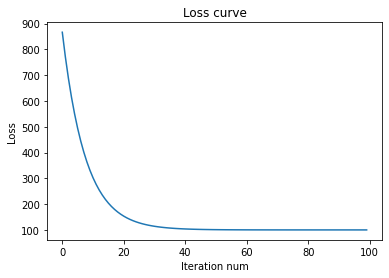

In [13]:

plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [14]:
def hypothesis(X,optimal_weights):
    return np.dot(X,optimal_weights)

In [15]:
y_pred = hypothesis(X, optimal_weights)

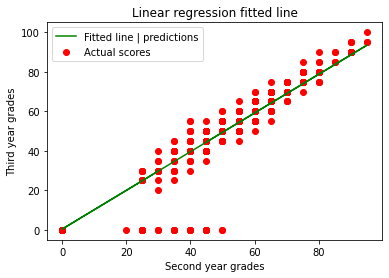

In [16]:
plt.scatter(X[:,1], y, c='r', label='Actual scores')
plt.plot(X[:,1], y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()

In [17]:
model=LinearRegression()
model.fit(X[:,1].reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_sklearn=model.predict(X[:,1].reshape(-1,1
                             ))

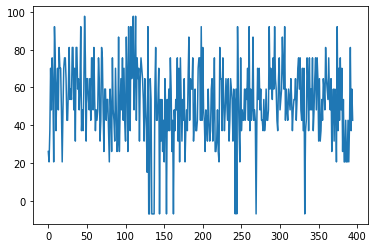

In [19]:
plt.plot(y_sklearn)

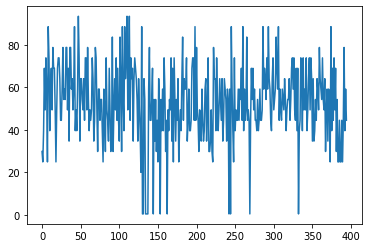

In [20]:
plt.plot(y_pred)